# Read the panther annotations for all uniprot ids.

In [1]:
# Gene ontology enrichment analysis
# Read definitions first
import pandas as pd
uniprot_to_panther = pd.read_csv('../databases/gene_ontology_custom/pantherGeneList.txt', sep='\t',
                                 names=['pantherid', 'uniprot', 'Gene Symbol', 'Panther family', 'Panther protein class', 'species'])


uniprot_to_panther.head()


,pantherid,uniprot,Gene Symbol,Panther family,Panther protein class,species
0,HUMAN|HGNC=16135|UniProtKB=Q8N6M3,Q8N6M3,Acyl-coenzyme A diphosphatase FITM2;FITM2;PTN0...,ACYL-COENZYME A DIPHOSPHATASE FITM2 (PTHR23129...,phosphatase(PC00181),Homo sapiens
1,HUMAN|HGNC=12859|UniProtKB=O00237,O00237,E3 ubiquitin-protein ligase RNF103;RNF103;PTN0...,E3 UBIQUITIN-PROTEIN LIGASE RNF103 (PTHR15302:...,ubiquitin-protein ligase(PC00234),Homo sapiens
2,HUMAN|HGNC=24616|UniProtKB=Q8N1G1,Q8N1G1,RNA exonuclease 1 homolog;REXO1;PTN002489741;o...,RNA EXONUCLEASE 1 HOMOLOG (PTHR12801:SF62),exoribonuclease(PC00099),Homo sapiens
3,HUMAN|HGNC=16710|UniProtKB=Q9H8T0,Q9H8T0,AKT-interacting protein;AKTIP;PTN002545715;ort...,AKT-INTERACTING PROTEIN (PTHR24068:SF525),ubiquitin-protein ligase(PC00234),Homo sapiens
4,HUMAN|HGNC=16112|UniProtKB=A0PJX2,A0PJX2,TLD domain-containing protein 2;TLDC2;PTN00251...,TLD DOMAIN-CONTAINING PROTEIN 2 (PTHR23354:SF65),NaN,Homo sapiens


In [3]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Helvetica'
matplotlib.rcParams['font.size']= 5

# Run the code for generating the plots. Set the loop length to either 5 or 8.

In [4]:
import os 
import pandas as pd
loop_length = 8 ## SET LOOP LENGTH HERE, TO 5 or 8!!
input_file = 'preprocessed_files/mining_{}res_summary.csv'.format(loop_length)

df = pd.read_csv(input_file)



In [5]:
# If the loop length==5, the RMSD cutoff should be stricter, at 0.5
if loop_length == 5:
    df = df[df['RMSD'] <= 0.5]

# If the loop length==8, the RMSD cutoff should be 0.75
if loop_length == 8:
    df = df[df['RMSD'] <= 0.75]

paper_validated = ['CSNK1A1', 'CSNK1D', 'NEK7', 'SCYL1', 'WEE1', 'TRIB1', \
                   'TRIB3', 'PLK3', 'PDE6D', 'GSPT1', 'CHD7', 'LIMD1',
                   'ASS1', 'WBP4', 'MNAT1', 'PPIL4',  'KIFC3', 'MTOR', 'HCK',
                   'ZMYM2', 'IKZF1', 'SALL4', 'IKZF2']

# Output a dataframe with just the paper results for easy verification

# Filter the dataframe to only the genes in paper_validated
paper_df = df[df['gene'].isin(paper_validated)]

# From the list of paper_validated, print those that are not in paper_df
print(set(paper_validated) - set(paper_df['gene'].values))

{'MTOR', 'HCK'}


In [7]:
total_gloops = len(df)
total_gloop_proteins = len(set(df['gene'].values))

print('Total g-loops: {}'.format(total_gloops))
print('Total g-loop proteins: {}'.format(total_gloop_proteins))

Total g-loops: 6315
Total g-loop proteins: 1577


In [8]:
# Open the list of extracellular domains. 
with open('../databases/extracellular_domains.list') as f: 
    extracellular_domains = f.read().splitlines()

# Remove from df the extracellular domains
df = df[~df['domain'].isin(extracellular_domains)]

In [9]:
# Remove lines where the domain is nan
df = df.dropna(subset=['domain'])

# Remove lines where the degron is nan
df = df.dropna(subset=['Degron'])

In [10]:
total_gloops = len(df)
total_gloop_proteins = len(set(df['gene'].values))

print('Total g-loops (no extracellular): {}'.format(total_gloops))
print('Total g-loop proteins (no extracellular): {}'.format(total_gloop_proteins))

Total g-loops (no extracellular): 6123
Total g-loop proteins (no extracellular): 1424


In [11]:
# Count how many g-loops are in C2H2 zinc fingers
print ('Length df = ', len(df))
c2h2 = df[df['C2H2'] == True]
c2h2_count = len(c2h2)
print('C2H2 zinc finger g-loops: {}'.format(c2h2_count))
# Print how many are not C2H2
not_c2h2 = df[df['C2H2'] == False]
not_c2h2_count = len(not_c2h2)
print('Not C2H2 zinc finger g-loops: {}'.format(not_c2h2_count))

# Sum the two and make sure it is the same as the total
print('Sum of C2H2 and not C2H2: {}'.format(c2h2_count + not_c2h2_count))

Length df =  6123
C2H2 zinc finger g-loops: 5160
Not C2H2 zinc finger g-loops: 963
Sum of C2H2 and not C2H2: 6123


In [12]:
# Use one G-loop per protein
df_unique_gene = df.drop_duplicates(subset='gene')

In [13]:
df.to_csv('preprocessed_files/mining_{}res_summary_noEC.csv'.format(loop_length), index=False)


In [14]:
# Save a list of predicted ZF genes.
c2h2_genes = df_unique_gene[df_unique_gene['C2H2'] ==  True ]['gene'].values
c2h2_genes = set(c2h2_genes)
with(open('preprocessed_files/c2h2_genes.txt', 'w')) as f:
    for gene in c2h2_genes:
        f.write(gene + '\n')

In [15]:
# Save a list of non-C2H2 genes
non_c2h2_genes = df_unique_gene[df_unique_gene['C2H2'] ==  False ]['gene'].values
non_c2h2_genes = set(non_c2h2_genes)
with(open('preprocessed_files/non_c2h2_genes.txt', 'w')) as f:
    for gene in non_c2h2_genes:
        f.write(gene + '\n')

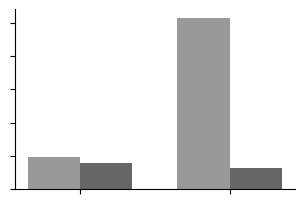

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Values

# Count the occurrences of True and False
count_series = df['C2H2'].value_counts()
count_series_unique = df_unique_gene['C2H2'].value_counts()

a1, b1, a2, b2 = count_series[0], count_series[1], count_series_unique[0], count_series_unique[1]

# Data setup
values = [a1, a2, b1, b2]
#group_labels = ['Non-C2H2', 'C2H2']
group_labels = ['', '']
# use pretty gray colors
colors = ['#999999', '#666666']

# Creating the bar plot
fig, ax = plt.subplots(figsize=(3.0, 2.0))
x = np.arange(len(group_labels))  # the label locations
width = 0.35  # the width of the bars

# Bars for a1, a2
ax.bar(x - width/2, [a1, b1], width, label='Total', color=colors[0])

# Bars for b1, b2
ax.bar(x + width/2, [a2, b2], width, label='Unique proteins', color=colors[1])

# Remove upper and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adding labels, title and custom x-axis tick labels, etc.
#ax.set_ylabel('Count')

ax.set_xticks(x)
ax.set_xticklabels(group_labels)
ax.set_yticklabels([])
#ax.legend(loc='upper left')

# Show plot
#plt.show()
if not os.path.exists('suppfig1'):
    os.mkdir('suppfig1')
# Use tight layout
plt.tight_layout()
plt.savefig('suppfig1/C2H2_vs_non_C2H2_{}.pdf'.format(loop_length), dpi=300, bbox_inches='tight')


In [17]:

def categorize_ss(x):
    
    if (('E' in x) or ('B' in x)) and 'H' not in x:
        return 'Beta hairpin\n(non-C2H2)'
    elif 'HHH' in x:
        return 'Helical'
    else:
        return 'Other'


df['Category'] = df['SS'].apply(categorize_ss)
# for every row, if the C2H2 column is True, then the value of the Category column is 'C2H2 ZF', otherwisethe value is unchanged 
df['Category'] = df.apply(lambda x: 'C2H2 ZF' if x['C2H2'] else x['Category'], axis=1)

category_counts = df['Category'].value_counts()


In [18]:
category_counts

Category
C2H2 ZF                     5160
Beta hairpin\n(non-C2H2)     911
Other                         52
Name: count, dtype: int64

### Plot all identified G-loops

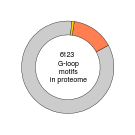

In [19]:


import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Helvetica'
matplotlib.rcParams['font.size']= 5

def categorize_ss(x):
    
    if (('E' in x) or ('B' in x)) and 'H' not in x:
        return 'Beta hairpin\n(non-C2H2)'
    elif 'HHH' in x:
        return 'Helical'
    else:
        return 'Other'


df['Category'] = df['SS'].apply(categorize_ss)
# for every row, if the C2H2 column is True, then the value of the Category column is 'C2H2 ZF', otherwisethe value is unchanged 
df['Category'] = df.apply(lambda x: 'C2H2 ZF' if x['C2H2'] else x['Category'], axis=1)

category_counts = df['Category'].value_counts()
total_proteins = category_counts.sum()
textprops = {'color': "black", 'fontsize': 5}  # Increase fontsize as needed

fig1, ax1 = plt.subplots()
fig1.set_size_inches(1.5, 1.5)
#colors = ['#D3D3D3', '#A9A9A9', '#696969']
#colors = ['#89CFF0', '#F88379', '#98FB98']  # Soft pastel colors
if loop_length == 8:
    colors = ['#CCCCCC', '#FF7F50', '#FFD700']  # Gray, coral, lavender, gold
elif loop_length == 5:
    colors = ['#CCCCCC', '#FF7F50', '#89CFF0', '#FFD700']  # Gray, coral, lavender, gold

#colors = ['#4c72b0', '#55a868', '#c44e52']  # Blue, green, red in hex

categories = category_counts.index



hatch = ['//', 'OO', '.']
if loop_length == 5:
    explode = (0.0, 0.0, 0.2, 0)
    wedges, texts, autotexts = ax1.pie(category_counts, startangle=40, colors=colors, textprops=textprops,
                                   wedgeprops={'width': 0.3, 'edgecolor': 'black', 'linewidth': 0.25}, autopct='',
                                   explode = explode)
elif loop_length == 8:
    explode = (0.0, 0.0, 0)  # explode 1st slice
    wedges, texts, autotexts = ax1.pie(category_counts, startangle=85, colors=colors, textprops=textprops,
                                   wedgeprops={'width': 0.3, 'edgecolor': 'black', 'linewidth': 0.25},
                                                autopct='', explode=explode)

# Adding annotations with arrows
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.0)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va='center')


unique_gene_count = len(set(df['gene'].values))
if loop_length == 5:
    ax1.text(0, 0, f'{unique_gene_count}\n minimal G-loop\n motifs\n in proteome', ha='center', va='center', fontsize=5)
else:
    ax1.text(0, 0, f'{total_proteins}\n G-loop\n motifs\n in proteome', ha='center', va='center', fontsize=5)
#plt.tight_layout()
if not os.path.exists('fig1'):
    os.mkdir('fig1')
plt.savefig('fig1/Secondary_structure_all{}.pdf'.format(loop_length), dpi=300)
plt.show()


### Plot only one G-loop per protein

/var/folders/nq/c118s1k508g8jf83mwb03yq40000gn/T/ipykernel_12550/984344629.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique_gene['Category'] = df_unique_gene['SS'].apply(categorize_ss)
/var/folders/nq/c118s1k508g8jf83mwb03yq40000gn/T/ipykernel_12550/984344629.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique_gene['Category'] = df_unique_gene.apply(lambda x: 'C2H2 ZF' if x['C2H2'] else x['Category'], axis=1)


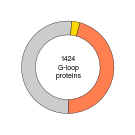

In [20]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Helvetica'
matplotlib.rcParams['font.size']= 5

def categorize_ss(x):
    
    if (('E' in x) or ('B' in x)) and 'H' not in x:
        return 'Beta hairpin\n(non-C2H2)'
    elif 'HHH' in x:
        return 'Helical'
    else:
        return 'Other'


df_unique_gene['Category'] = df_unique_gene['SS'].apply(categorize_ss)
# for every row, if the C2H2 column is True, then the value of the Category column is 'C2H2 ZF', otherwisethe value is unchanged 
df_unique_gene['Category'] = df_unique_gene.apply(lambda x: 'C2H2 ZF' if x['C2H2'] else x['Category'], axis=1)

category_counts = df_unique_gene['Category'].value_counts()
total_proteins = category_counts.sum()
textprops = {'color': "black", 'fontsize': 5}  # Increase fontsize as needed

fig1, ax1 = plt.subplots()
fig1.set_size_inches(1.5, 1.5)
#colors = ['#D3D3D3', '#A9A9A9', '#696969']
#colors = ['#89CFF0', '#F88379', '#98FB98']  # Soft pastel colors
if loop_length == 8:
    colors = ['#CCCCCC', '#FF7F50', '#FFD700']  # Gray, coral, lavender, gold
elif loop_length == 5:
    colors = ['#CCCCCC', '#FF7F50', '#89CFF0', '#FFD700']  # Gray, coral, lavender, gold

#colors = ['#4c72b0', '#55a868', '#c44e52']  # Blue, green, red in hex

categories = category_counts.index



hatch = ['//', 'OO', '.']
if loop_length == 5:
    explode = (0.0, 0.0, 0.2, 0)
    wedges, texts, autotexts = ax1.pie(category_counts, startangle=40, colors=colors, textprops=textprops,
                                   wedgeprops={'width': 0.3, 'edgecolor': 'black', 'linewidth': 0.25}, autopct='',
                                   explode = explode)
elif loop_length == 8:
    explode = (0.0, 0.0, 0)  # explode 1st slice
    wedges, texts, autotexts = ax1.pie(category_counts, startangle=85, colors=colors, textprops=textprops,
                                   wedgeprops={'width': 0.3, 'edgecolor': 'black', 'linewidth': 0.25},
                                                autopct='', explode=explode)

# Adding annotations with arrows
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.0)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va='center')


unique_gene_count = len(set(df_unique_gene['gene'].values))
if loop_length == 5:
    ax1.text(0, 0, f'{unique_gene_count}\n minimal G-loop\n proteins', ha='center', va='center', fontsize=5)
else:
    ax1.text(0, 0, f'{total_proteins}\n G-loop\n proteins', ha='center', va='center', fontsize=5)
#plt.tight_layout()
if not os.path.exists('fig1'):
    os.mkdir('fig1')
plt.savefig('fig1/Secondary_structure_{}.pdf'.format(loop_length), dpi=300)
plt.show()


In [24]:
df_all_gloops = df
df = df_unique_gene

category_counts



Category
Beta hairpin\n(non-C2H2)    737
C2H2 ZF                     646
Other                        41
Name: count, dtype: int64

In [25]:
helical_df = df[df['Category'] == 'Helical']
# print all rows of helical_df
# reset index
helical_df = helical_df.reset_index(drop=True)

In [26]:
# Count for how many it is found on the kinase domain
df['Kinase domain'] = df['domain'].apply(lambda x: 'Kinase domain' if 'kinase' in x else 'Other')
category_counts = df['Kinase domain'].value_counts()
print(category_counts)

Kinase domain
Other            1267
Kinase domain     157
Name: count, dtype: int64


/var/folders/nq/c118s1k508g8jf83mwb03yq40000gn/T/ipykernel_12550/3673524359.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Kinase domain'] = df['domain'].apply(lambda x: 'Kinase domain' if 'kinase' in x else 'Other')


# Plot protein by processes or molecular function.

In [27]:
# Remove all rows with C2H2 ZF as the category
# Remove entries where the degron is NaN

c2h2 = df[df['Category'] == 'C2H2 ZF']
nonc2h2 = df[df['Category'] == 'Beta hairpin\n(non-C2H2)']
helical_df = df[df['Category'] == 'Helical']
other_df = df[df['Category'] == 'Other']
kinase_df = df[df['Kinase domain'] == 'Kinase domain']

df = df[df['Category'] != 'C2H2 ZF']
print(len(df))

if loop_length == 8:
    df = nonc2h2

if loop_length == 5:
    df = helical_df

778


In [28]:
kinase_df

,Unnamed: 0,PDBID,RMSD,Clashing_CA,Clashing,Res0,Res1,Res2,Res3,Res4,...,uniprot,domain,domain_fn,start,end,key,compound_score,C2H2,Category,Kinase domain
0,0,5fqd_C,0.000467,0.0,0.0,ILE 35,ASN 36,ILE 37,THR 38,ASN 39,...,P48729,Protein kinase domain,NaN,1.0,337.0,CSNK1A1:ILE 35:ASN 36:ILE 37:THR 38:ASN 39:,2140.108411,0,Beta hairpin\n(non-C2H2),Kinase domain
2,5,CSNK1A1LxProtein-kinase-domain-17-285_A,0.172094,0.0,5.0,ILE 35,THR 36,THR 37,THR 38,ASN 39,...,Q8N752,Protein kinase domain,Protein-kinase-domain,17.0,285.0,CSNK1A1L:ILE 35:THR 36:THR 37:THR 38:ASN 39:,5.810767,0,Beta hairpin\n(non-C2H2),Kinase domain
51,81,PAK4xProtein-kinase-domain-326-572_A,0.205355,1.0,2.0,THR 339,VAL 340,ARG 341,SER 342,SER 343,...,O96013,Protein kinase domain,Protein-kinase-domain,326.0,572.0,PAK4:THR 339:VAL 340:ARG 341:SER 342:SER 343:,4.869606,0,Beta hairpin\n(non-C2H2),Kinase domain
73,115,MYO3BxProtein-kinase-domain-27-293_A,0.210143,1.0,5.0,THR 45,ASN 46,LYS 47,ARG 48,ASP 49,...,Q8WXR4,Protein kinase domain,Protein-kinase-domain,27.0,293.0,MYO3B:THR 45:ASN 46:LYS 47:ARG 48:ASP 49:,4.758663,0,Beta hairpin\n(non-C2H2),Kinase domain
78,125,5kbr_B,0.210823,1.0,8.0,MET 288,ASP 289,VAL 290,ALA 291,THR 292,...,Q13153,Protein kinase domain,NaN,254.0,542.0,PAK1:MET 288:ASP 289:VAL 290:ALA 291:THR 292:,4.743314,0,Beta hairpin\n(non-C2H2),Kinase domain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6110,12839,NRBP1xProtein-kinase-domain-68-327_A,0.594249,0.0,8.0,MET 86,ASP 87,THR 88,GLU 89,GLU 90,...,Q9UHY1,Protein kinase domain,Protein-kinase-domain,68.0,327.0,NRBP1:MET 86:ASP 87:THR 88:GLU 89:GLU 90:,1.682797,0,Beta hairpin\n(non-C2H2),Kinase domain
6114,12852,NRBP2xProtein-kinase-domain-38-306_A,0.597788,0.0,6.0,MET 59,ASP 60,THR 61,GLU 62,GLU 63,...,Q9NSY0,Protein kinase domain,Protein-kinase-domain,38.0,306.0,NRBP2:MET 59:ASP 60:THR 61:GLU 62:GLU 63:,1.672834,0,Beta hairpin\n(non-C2H2),Kinase domain
6263,13268,SCUBE1xTyrosine-protein-kinase-ephrin-type-A-B...,0.703886,0.0,5.0,PHE 639,GLY 640,GLY 641,GLU 642,LEU 643,...,Q8IWY4,Tyrosine-protein kinase ephrin type A/B recept...,Tyrosine-protein-kinase-ephrin-type-A-B-recept...,636.0,683.0,SCUBE1:PHE 639:GLY 640:GLY 641:GLU 642:LEU 643:,1.420684,0,Beta hairpin\n(non-C2H2),Kinase domain
6291,13355,3e7o_A,0.725548,0.0,6.0,PHE 44,ASP 45,THR 46,VAL 47,LEU 48,...,P45984,Protein kinase domain,NaN,7.0,362.0,MAPK9:PHE 44:ASP 45:THR 46:VAL 47:LEU 48:,1.378269,0,Beta hairpin\n(non-C2H2),Kinase domain


In [29]:
# Save the dataframe to a new file
uniprots = df['uniprot']

uniprots = uniprots.drop_duplicates()
uniprots.to_csv('preprocessed_files/mining_{}_uniprots.csv'.format(loop_length), index=False)



In [30]:
uniprot_to_panther_gloops = uniprot_to_panther[uniprot_to_panther['uniprot'].isin(uniprots)]
df_noduplicates = df.drop_duplicates(subset='uniprot')
# Add the gene name from the df dataframe
uniprot_to_panther_gloops = uniprot_to_panther_gloops.merge(df_noduplicates[['uniprot', 'gene']], on='uniprot', how='left')

panther_name_conversion = {
    "non-receptor serine/threonine protein kinase(PC00167)": "Ser/Thr kinase",
    "scaffold/adaptor protein(PC00226)": "Scaffold protein",
    "cysteine protease(PC00081)": "Cysteine protease",
    "ubiquitin-protein ligase(PC00234)": "Ubiquitin ligase",
    "RNA metabolism protein(PC00031)": "RNA metabolism protein",
    "actin or actin-binding cytoskeletal protein(PC00041)": "Actin-binding protein",
    "chromatin/chromatin-binding, or -regulatory protein(PC00077)": "Chromatin protein",
    "transmembrane signal receptor(PC00197)": "Signal receptor",
    "translation initiation factor(PC00224)": "Translation factor",
    "DNA metabolism protein(PC00009)": "DNA metabolism protein",
    "ion channel(PC00133)": "Ion channel",
    "RNA splicing factor(PC00148)": "RNA splicing factor",
    "Hsp70 family chaperone(PC00027)": "Hsp70 chaperone",
    "RNA processing factor(PC00147)": "RNA processing factor",
    "protein phosphatase(PC00195)": "Protein phosphatase",
    "microtubule binding motor protein(PC00156)": "Motor protein",
    "phosphodiesterase(PC00185)": "Phosphodiesterase",
    "transcription cofactor(PC00217)": "Transcription cofactor",
    "chaperone(PC00072)": "Chaperone",
    "ligase(PC00142)": "Ligase",
    "translation factor(PC00223)": "Translation factor",
    "zinc finger transcription factor(PC00244)": "Transcription factor",
    "non-receptor tyrosine protein kinase(PC00168)": "Tyr kinase",

}

# Simplify the names for the most common
uniprot_to_panther_gloops['Panther protein class'] = uniprot_to_panther_gloops['Panther protein class'].apply(lambda x: panther_name_conversion[x] if x in panther_name_conversion else x)

In [31]:
# Get the protein class for validated targets 
uniprot_to_panther_gloops_validated = uniprot_to_panther_gloops[uniprot_to_panther_gloops['gene'].isin(paper_validated)]
uniprot_to_panther_gloops_validated = uniprot_to_panther_gloops_validated.drop_duplicates(subset='gene')
print(uniprot_to_panther_gloops_validated[['gene','Panther protein class']])

# Set those with NaN to 'Other'
uniprot_to_panther_gloops['Panther protein class'] = uniprot_to_panther_gloops['Panther protein class'].fillna('Other')

        gene   Panther protein class
18     ZMYM2    Transcription factor
65     TRIB3          Ser/Thr kinase
103    PDE6D       Phosphodiesterase
108    PPIL4               Chaperone
125     WBP4                     NaN
157    KIFC3           Motor protein
159     CHD7       Chromatin protein
174     WEE1          Ser/Thr kinase
254    TRIB1          Ser/Thr kinase
281    LIMD1  Transcription cofactor
285   CSNK1D          Ser/Thr kinase
294    MNAT1               Chaperone
438     ASS1                  Ligase
440     PLK3          Ser/Thr kinase
444    SCYL1          Ser/Thr kinase
482    GSPT1      Translation factor
677  CSNK1A1          Ser/Thr kinase
691     NEK7          Ser/Thr kinase


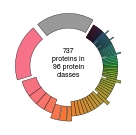

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_filtered = uniprot_to_panther_gloops

# Convert long names to shorter ones
#df_filtered['Panther protein class'] = df_filtered['Panther protein class'].map(panther_name_conversion, na_action='ignore')

counts = df_filtered['Panther protein class'].value_counts()

# Set the font globally to Arial
matplotlib.rcParams['font.family'] = 'Helvetica'

# Keep only the top 8 domains
top_domains = counts
# Sum all other domain counts and add them as 'Other'
#other_count = domain_counts[8:].sum()
#top_domains['Other'] = other_count

top_domain_values = top_domains.values.astype(float)

# Explode slices corresponding to the validated domains
labels = [x for x in top_domains.index]
explode = [0.0] * len(top_domains)  # Explode all slices
for ix, label in enumerate(labels): 
    if loop_length == 8:
        if label in ['Ser/Thr kinase',  'Phosphodiesterase', 'RNA metabolism protein', 'Chromatin protein', 'Ligase', 'Motor protein', 'Chaperone', 'Ligase', 'Translation factor', 'Transcription factor', 'Other']:
            explode[ix] = 0.10
        elif label not in ['C2H2 ZF']:
            explode[ix] = 0.0
            labels[ix] = ''
    elif loop_length == 5:
        if label in ['Ser/Thr kinase',  'Tyr kinase']:
            explode[ix] = 0.10
        elif label not in ['C2H2 ZF']:
            explode[ix] = 0.0
            labels[ix] = ''


# Set a nice color palette
colors0 = [(0.6, 0.6, 0.6)] # Append a distinct gray for 'Other'
colors1 = sns.color_palette('husl', n_colors=len(top_domains))  # Generate colors for all but the 'Other' category
colors0.extend(colors1)  # Append a distinct light gray for 'Other'
colors = colors0

# Create the pie chart
if loop_length == 8:
    plt.figure(figsize=(1.5, 1.5))  # Set the figure size
    wedges, texts = plt.pie(top_domains, labels=['']*len(labels), startangle=60, wedgeprops={'width': 0.3, 'edgecolor': 'black', 'linewidth': 0.25}, \
                            colors=colors, explode=explode, textprops={'fontsize': 5})
elif loop_length == 5:
    plt.figure(figsize=(1.0, 1.0))  # Set the figure size
    wedges, texts = plt.pie(top_domains, labels=['']*len(labels), startangle=240, wedgeprops={'width': 0.3, 'edgecolor': 'black', 'linewidth': 0.25}, \
                            colors=colors, explode=explode, textprops={'fontsize': 5}) 

# Correct way to set properties for texts
plt.setp(texts, size=5, weight="bold", color="black")  # Customizing label texts

total_proteins = len(df)
total_classes = len(counts)
plt.text(0, 0, f'{total_proteins}\nproteins in \n{total_classes} protein\nclasses\n', ha='center', va='center', fontsize=5)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#plt.tight_layout()
plt.savefig('fig1/Top_20_protein_classes_{}.pdf'.format(loop_length), dpi=300)

In [34]:
top_domains

Panther protein class
Other                                         140
Ser/Thr kinase                                137
Scaffold protein                               39
Ubiquitin ligase                               25
Actin-binding protein                          22
                                             ... 
transfer/carrier protein(PC00219)               1
tyrosine protein kinase receptor(PC00233)       1
dehydratase(PC00091)                            1
metabolite interconversion enzyme(PC00262)      1
galactosidase(PC00104)                          1
Name: count, Length: 96, dtype: int64

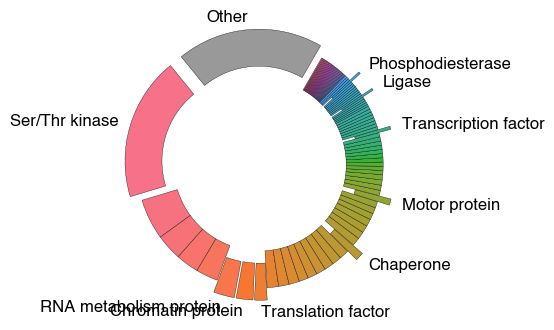

In [35]:
# Plot one with labels so that I can see the values
plt.figure(figsize=(4, 4))  # Set the figure size
wedges, texts = plt.pie(top_domains, labels=labels, startangle=60, wedgeprops={'width': 0.3, 'edgecolor': 'black', 'linewidth': 0.25}, colors=colors, explode=explode, textprops={'fontsize': 12})


In [36]:
pd.set_option('display.max_rows', None)
top_domains.head(100)

Panther protein class
Other                                                               140
Ser/Thr kinase                                                      137
Scaffold protein                                                     39
Ubiquitin ligase                                                     25
Actin-binding protein                                                22
Cysteine protease                                                    21
RNA metabolism protein                                               20
Chromatin protein                                                    16
Translation factor                                                   12
Signal receptor                                                      11
Hsp70 chaperone                                                      10
Ion channel                                                          10
Protein phosphatase                                                   9
metalloprotease(PC00153)                  

In [37]:
df[df['gene']== 'PDE6D']

,Unnamed: 0,PDBID,RMSD,Clashing_CA,Clashing,Res0,Res1,Res2,Res3,Res4,...,uniprot,domain,domain_fn,start,end,key,compound_score,C2H2,Category,Kinase domain
3755,6817,3t5i_B,0.297306,0.0,2.0,ARG 23,ASP 24,ALA 25,GLU 26,THR 27,...,O43924,"GMP phosphodiesterase, delta subunit superfamily",NaN,1.0,150.0,PDE6D:ARG 23:ASP 24:ALA 25:GLU 26:THR 27:,3.363535,0,Beta hairpin\n(non-C2H2),Other


## Plot domains

In [38]:
undruggable_df = df_all_gloops[df_all_gloops['Category'] == 'Beta hairpin\n(non-C2H2)']

In [39]:
# For the most common domain types, change the name to a shorter version so that it fits in the plot
import pandas as pd

# Assuming 'df' is your DataFrame and it has a column named 'domain'
# Here is the mapping dictionary from old full names to new abbreviated names:
domain_name_mapping = {
    "Protein kinase domain": "Kinase",
    "Zinc finger C2H2-type": "C2H2 ZF",
    "RNA recognition motif domain": "RRM",
    "SH3 domain": "SH3",
    "Zinc finger, LIM-type": "LIM ZF",
    "WW domain": "WW",
    "Nucleotide-binding alpha-beta plait domain superfamily": "NABP",
    "Ubiquitin specific protease domain": "USP",
    "Peptidase C19, ubiquitin carboxyl-terminal hydrolase": "Peptidase C19",
    "B-box-type zinc finger": "B-box ZF",
    "Heat shock protein 70 family": "HSP70",
    "Ran binding domain": "Ran BD",
    "Zinc finger, RING/FYVE/PHD-type": "RING+ ZF",
    'Zinc finger, RING-type': 'RING+ ZF',
    "Zinc finger, PHD-finger": "RING+ ZF",
    "Kelch-type beta propeller": "Kelch BP",
    "Protein-tyrosine phosphatase-like": "PTP-like",
    "Helicase, C-terminal": "Helicase C-term",
    'BRK domain superfamily': 'BRK',
    'BRK domain': 'BRK',
    'IPT domain': 'IPT',
    'Zinc finger, MYM-type': 'MYM ZF',
    'Argininosuccinate synthase': 'HUP',
    'Kinesin motor domain': 'Kinesin',
}

def map_domain_names(domain):
    if domain in domain_name_mapping:
        return domain_name_mapping[domain]
    return domain

# Use the map function to convert the 'domain' column
undruggable_df['domain'] = undruggable_df['domain'].map(map_domain_names)

/var/folders/nq/c118s1k508g8jf83mwb03yq40000gn/T/ipykernel_12550/336111011.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  undruggable_df['domain'] = undruggable_df['domain'].map(map_domain_names)


In [40]:
undruggable_df[undruggable_df['gene']=='ASS1']

,Unnamed: 0,PDBID,RMSD,Clashing_CA,Clashing,Res0,Res1,Res2,Res3,Res4,...,gene,uniprot,domain,domain_fn,start,end,key,compound_score,C2H2,Category
6172,13006,2nz2_A,0.635711,0.0,1.0,THR 236,ASN 237,VAL 238,LYS 239,ASP 240,...,ASS1,P00966,HUP,NaN,1.0,412.0,ASS1:THR 236:ASN 237:VAL 238:LYS 239:ASP 240:,1.573042,0,Beta hairpin\n(non-C2H2)


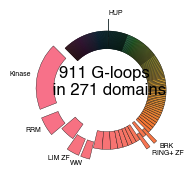

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

# Set the font globally to Helvetica
matplotlib.rcParams['font.family'] = 'Helvetica'

# Count the occurrences of each domain
domain_counts = undruggable_df['domain'].value_counts()

# Keep only the top 8 domains
top_domains = domain_counts

top_domain_values = top_domains.values.astype(float)

# Explode slices corresponding to the validated domains
labels = [x for x in top_domains.index]
explode = [0.0] * len(top_domains)  # Explode all slices
for ix, label in enumerate(labels): 
    if label in ['RRM', 'BRK', 'Kinase', 'HUP']:
        explode[ix] = 0.20
    elif label in ['RING+ ZF', 'LIM ZF', 'WW', 'HUP']:
        explode[ix] = 0.20
    elif label not in ['C2H2 ZF']:
        explode[ix] = 0.0
        labels[ix] = ''

# Set a nice color palette
colors = sns.color_palette('husl', n_colors=len(top_domains))  # Generate colors for all but the 'Other' category

# Create the pie chart
plt.figure(figsize=(2, 2))  # Set the figure size
wedges, texts = plt.pie(top_domains, labels=labels, startangle=135, wedgeprops={'width': 0.3, 'edgecolor': 'black', 'linewidth': 0.25}, colors=colors, explode=explode, textprops={'fontsize': 12})

# Correct way to set properties for texts
plt.setp(texts, size=5, weight="bold", color="black")  # Customizing label texts

total_unique_domains = len(set(undruggable_df['domain'].values))
total_gloops = domain_counts.sum()
total_proteins = len(set(undruggable_df['gene'].values))
plt.text(0, 0, f'{total_gloops} G-loops \n in {total_unique_domains} domains\n', ha='center', va='center', fontsize=12)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('domains_reference.png', dpi=300)
plt.show()


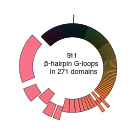

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

# Set the font globally to Arial
matplotlib.rcParams['font.family'] = 'Helvetica'

# Count the occurrences of each domain
domain_counts = undruggable_df['domain'].value_counts()

# Keep only the top 8 domains
top_domains = domain_counts

top_domain_values = top_domains.values.astype(float)

# Explode slices corresponding to the validated domains
labels = [x for x in top_domains.index]
explode = [0.0] * len(top_domains)  # Explode all slices
for ix, label in enumerate(labels): 
    if label in ['RRM', 'BRK', 'Kinase', 'HUP']:
        explode[ix] = 0.20
        labels[ix] = ''
    elif label in ['RING+ ZF', 'LIM ZF', 'WW', 'HUP']:
        explode[ix] = 0.20
        labels[ix] = ''
    elif label not in ['C2H2 ZF']:
        explode[ix] = 0.0
        labels[ix] = ''

# Set a nice color palette
colors = sns.color_palette('husl', n_colors=len(top_domains))  # Generate colors for all but the 'Other' category

# Create the pie chart
plt.figure(figsize=(1.5, 1.5))  # Set the figure size
wedges, texts = plt.pie(top_domains, labels=labels, startangle=135, wedgeprops={'width': 0.3, 'edgecolor': 'black', 'linewidth': 0.25}, colors=colors, explode=explode, textprops={'fontsize': 5})

# Correct way to set properties for texts
plt.setp(texts, size=5, weight="bold", color="black")  # Customizing label texts

total_unique_domains = len(set(undruggable_df['domain'].values))
total_gloops = domain_counts.sum()
total_proteins = len(set(undruggable_df['gene'].values))
plt.text(0, 0, f'{total_gloops}\nβ-hairpin G-loops \n in {total_unique_domains} domains\n', ha='center', va='center', fontsize=5)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('fig1/Top_20_domains_{}.pdf'.format(loop_length), dpi=300)
plt.show()



# Logoplot section

In [49]:
import logomaker
import pandas as pd
import matplotlib.pyplot as plt

def make_logoplot(df, outfn, degron_range=(7, 20), glycine_ix=5):
    all_sequences = df['Degron'].values

    # Convert list of sequences into a DataFrame where each column represents a position in the sequence
    all_seqs = pd.DataFrame([list(seq)[degron_range[0]:degron_range[1]] for seq in all_sequences])
    
    print('Number of sequences used: ', all_seqs.shape)

    # Calculate the frequency of each base at each position
    freq_matrix = all_seqs.apply(lambda x: x.value_counts(normalize=True), axis=0).fillna(0)

    # Filter to keep only frequencies greater than 0.1
    threshold_freq_matrix = freq_matrix.apply(lambda x: x[x > 0.1], axis=0).fillna(0)

    # Create a logo from the filtered frequency matrix with a color scheme
    logo = logomaker.Logo(threshold_freq_matrix.T, font_name='Helvetica', color_scheme='chemistry', )

    # Configure the plot
    logo.ax.set_xticklabels('')
    logo.ax.set_yticklabels('')

    style_sequence = ['.']*(degron_range[1] - degron_range[0])
    style_sequence = ''.join(style_sequence)

    # Set font sizes
    logo.style_glyphs_in_sequence(sequence=style_sequence,color='black', alpha=1, font_name='Helvetica', font_size=5)

    # make ticks invisible
    logo.ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    logo.ax.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

    # Remove upper and right borders
    logo.ax.spines['top'].set_visible(False)
    logo.ax.spines['right'].set_visible(False)
    logo.ax.spines['left'].set_visible(False)

    # Make the plot size 0.2x2 inches
    logo.ax.figure.set_size_inches(0.65, 0.5)

    # Show plot
    logo.fig.show()
    logo.fig.savefig(outfn, dpi=300)

In [50]:
category_counts = df['Category'].value_counts()
category_counts

Category
Beta hairpin\n(non-C2H2)    737
Name: count, dtype: int64

Number of sequences used:  (646, 13)
Number of sequences used:  (737, 13)
Number of sequences used:  (41, 13)


/var/folders/nq/c118s1k508g8jf83mwb03yq40000gn/T/ipykernel_12550/480525753.py:45: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  logo.fig.show()
/var/folders/nq/c118s1k508g8jf83mwb03yq40000gn/T/ipykernel_12550/480525753.py:45: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  logo.fig.show()
/var/folders/nq/c118s1k508g8jf83mwb03yq40000gn/T/ipykernel_12550/480525753.py:45: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  logo.fig.show()


Number of sequences used:  (157, 13)


/var/folders/nq/c118s1k508g8jf83mwb03yq40000gn/T/ipykernel_12550/480525753.py:45: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  logo.fig.show()


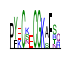

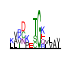

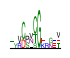

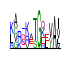

In [51]:


outfn = 'fig1/sequence_logo_{}reswindow_C2H2.pdf'
make_logoplot(c2h2, outfn.format(loop_length))

outfn = 'fig1/sequence_logo_{}reswindow_nonC2H2.pdf'
make_logoplot(nonc2h2, outfn.format(loop_length))

if len(helical_df) > 0:
    outfn = 'fig1/sequence_logo_{}reswindow_helical.pdf'
    make_logoplot(helical_df, outfn.format(loop_length))

outfn = 'fig1/sequence_logo_{}reswindow_other.pdf'
make_logoplot(other_df, outfn.format(loop_length))

outfn = 'fig1/sequence_logo_{}reswindow_kinase.pdf'
make_logoplot(kinase_df, outfn.format(loop_length))




Number of sequences used:  (646, 28)
Number of sequences used:  (737, 28)


/var/folders/nq/c118s1k508g8jf83mwb03yq40000gn/T/ipykernel_12550/480525753.py:45: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  logo.fig.show()
/var/folders/nq/c118s1k508g8jf83mwb03yq40000gn/T/ipykernel_12550/480525753.py:45: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  logo.fig.show()


Number of sequences used:  (41, 28)


/var/folders/nq/c118s1k508g8jf83mwb03yq40000gn/T/ipykernel_12550/480525753.py:45: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  logo.fig.show()


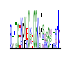

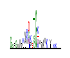

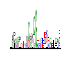

In [52]:
if os.path.exists('degron_sequence_analysis_supplement') == False:
    os.mkdir('degron_sequence_analysis_supplement')
    
outfn = 'degron_sequence_analysis_supplement/sequence_logo_{}reswindow_C2H2.pdf'
make_logoplot(c2h2, outfn.format(loop_length), degron_range=(0,28), glycine_ix=14)

outfn = 'degron_sequence_analysis_supplement/sequence_logo_{}reswindow_nonC2H2.pdf'
make_logoplot(nonc2h2, outfn.format(loop_length), degron_range=(0,28), glycine_ix=14)

if len(helical_df) > 0:
    outfn = 'degron_sequence_analysis_supplement/sequence_logo_{}reswindow_helical.pdf'
    make_logoplot(helical_df, outfn.format(loop_length), degron_range=(0,28), glycine_ix=14)

outfn = 'degron_sequence_analysis_supplement/sequence_logo_{}reswindow_other.pdf'
make_logoplot(other_df, outfn.format(loop_length), degron_range=(0,28), glycine_ix=14)

